In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [135]:
from GetData.read_data import get_stock_data
from _datetime import datetime

In [136]:
Amazon = get_stock_data(name = 'AMZN', start = datetime(2017, 1, 1), end=datetime(2019, 1, 1))

In [178]:
y = 1 * ((Amazon.Close - np.mean(Amazon.Close))>0)

In [179]:
[train_data_x, test_data_x, train_data_y, test_data_y] = train_test_split(Amazon.Close, y, test_size=0.3, random_state=5)

In [180]:
LG = LogisticRegression(solver='lbfgs')

In [181]:
import numpy as np
train_x = np.asarray(train_data_x).reshape(-1, 1)
test_x = np.asarray(test_data_x).reshape(-1, 1)
train_y = np.asarray(train_data_y)
test_y = np.asarray(test_data_y)
estimator = LG.fit(train_x, train_y)
print(estimator)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [192]:
y_hat = estimator.predict(test_x)
print(y_hat)

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [193]:
accuracy = np.mean(test_y == y_hat) * 100
accuracy

100.0

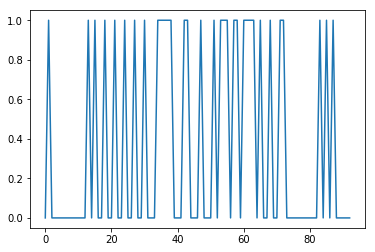

In [197]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(y_hat)), y_hat)